In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datix_df = pd.read_csv("Data/test_data.csv")

In [3]:
# check for missing values:
datix_df.isnull().sum()

Datix ID                                      0
Category                                      0
Sub Category                                  0
Result                                        0
Actual Harm                                   0
Incident Date                                 0
Time of Incident                              0
Reported Date                                 0
Division                                      0
Speciality                                    0
Location (Exact)                              0
What Happened?                                0
Action Taken (at the time of the incident)    0
Summary of Actions Taken (Investigation)      0
Lessons Learned                               1
Approved Date                                 0
dtype: int64

<Figure size 1200x800 with 0 Axes>

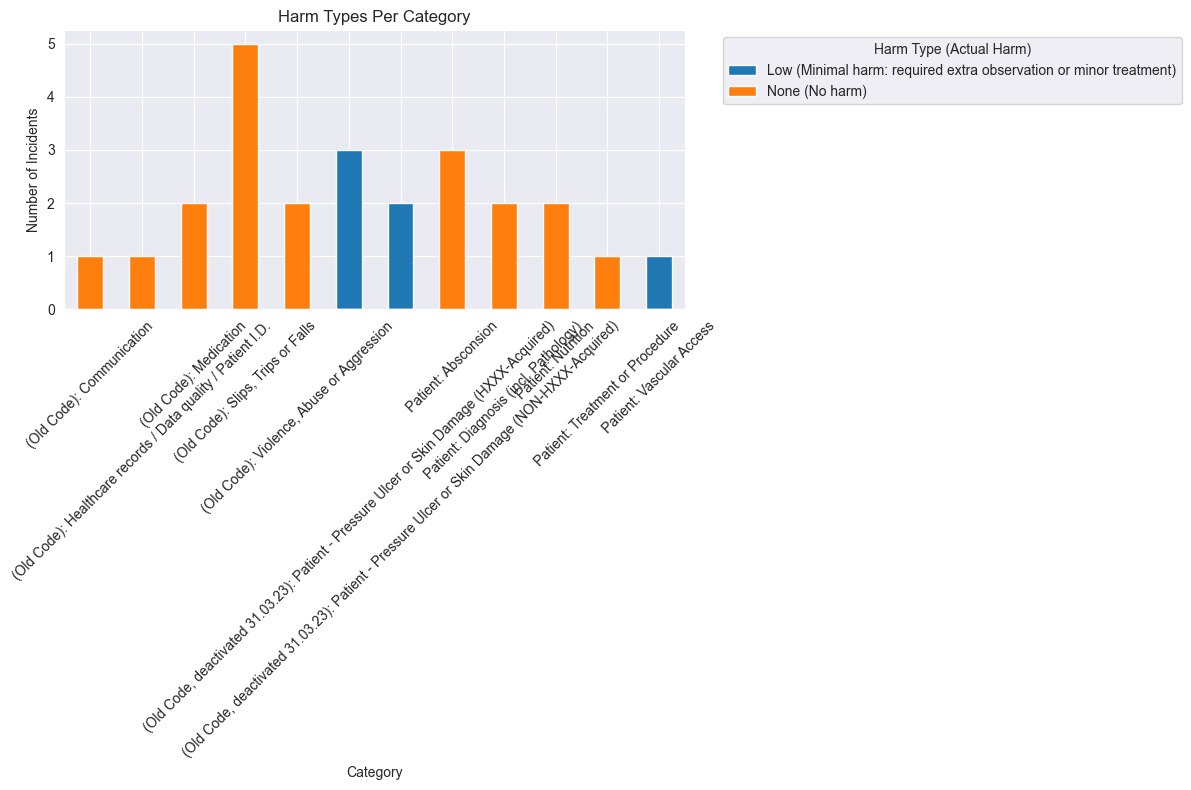

In [16]:
harm_by_category = datix_df.groupby(['Category', 'Actual Harm']).size().unstack()

plt.figure(figsize=(12, 8))
harm_by_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Harm Types Per Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title="Harm Type (Actual Harm)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


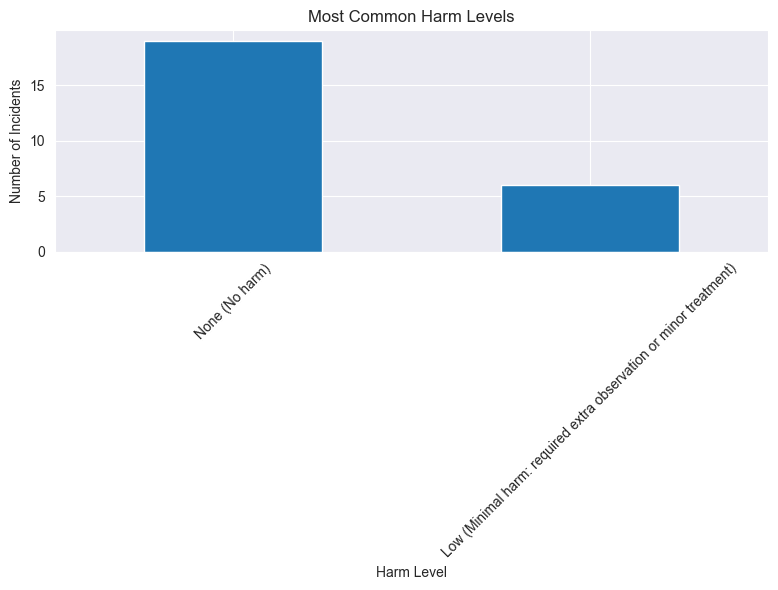

In [17]:
harm_level_counts = datix_df['Actual Harm'].value_counts()

plt.figure(figsize=(8, 6))
harm_level_counts.plot(kind='bar')
plt.title('Most Common Harm Levels')
plt.xlabel('Harm Level')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Convert 'Time of Incident' to datetime and round to nearest hour as keep getting an error?
datix_df['Time of Incident'] = pd.to_datetime(datix_df['Time of Incident'], format='%H:%M')
datix_df['Time Rounded'] = datix_df['Time of Incident'].dt.round('H')

incident_by_hour = datix_df.groupby(datix_df['Time Rounded'].dt.hour).size()

# Create an interactive bar plot using Plotly
fig = px.bar(incident_by_hour, 
             x=incident_by_hour.index, 
             y=incident_by_hour.values, 
             labels={'x':'Hour of the Day', 'y':'Number of Incidents'},
             title='Incident Distribution by Rounded Hour')

fig.show()


C:\Users\flami\AppData\Local\Temp\ipykernel_32672\71455053.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datix_df['Time Rounded'] = datix_df['Time of Incident'].dt.round('H')


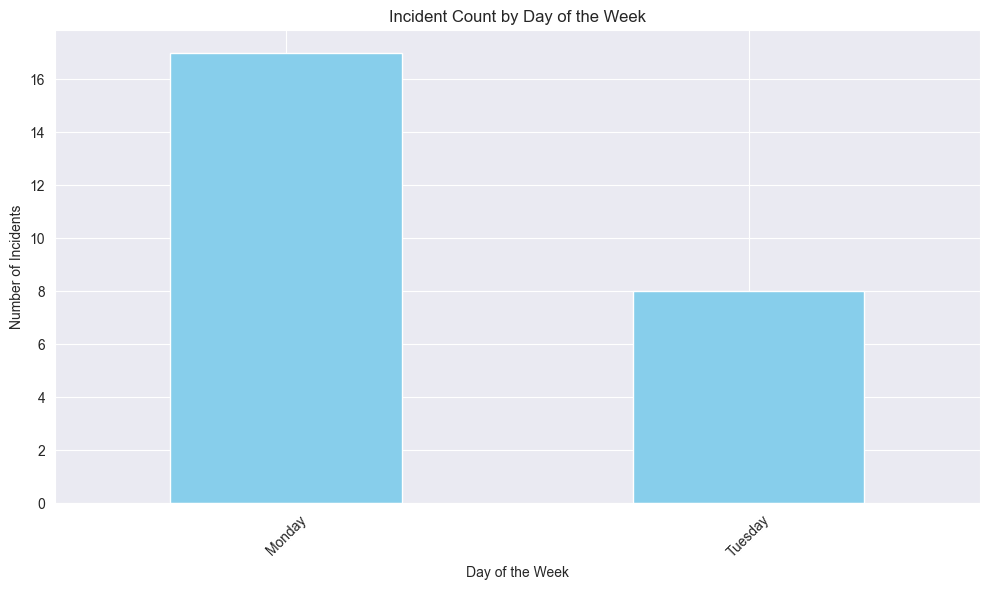

In [22]:
# Convert 'Incident Date' to datetime if not already
datix_df['Incident Date'] = pd.to_datetime(datix_df['Incident Date'], format='%d/%m/%Y')

# Extract the day of the week (Monday = 0, Sunday = 6)
datix_df['Day of Week'] = datix_df['Incident Date'].dt.day_name()

incidents_by_day = datix_df['Day of Week'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
incidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Incident Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

datix_df.head()


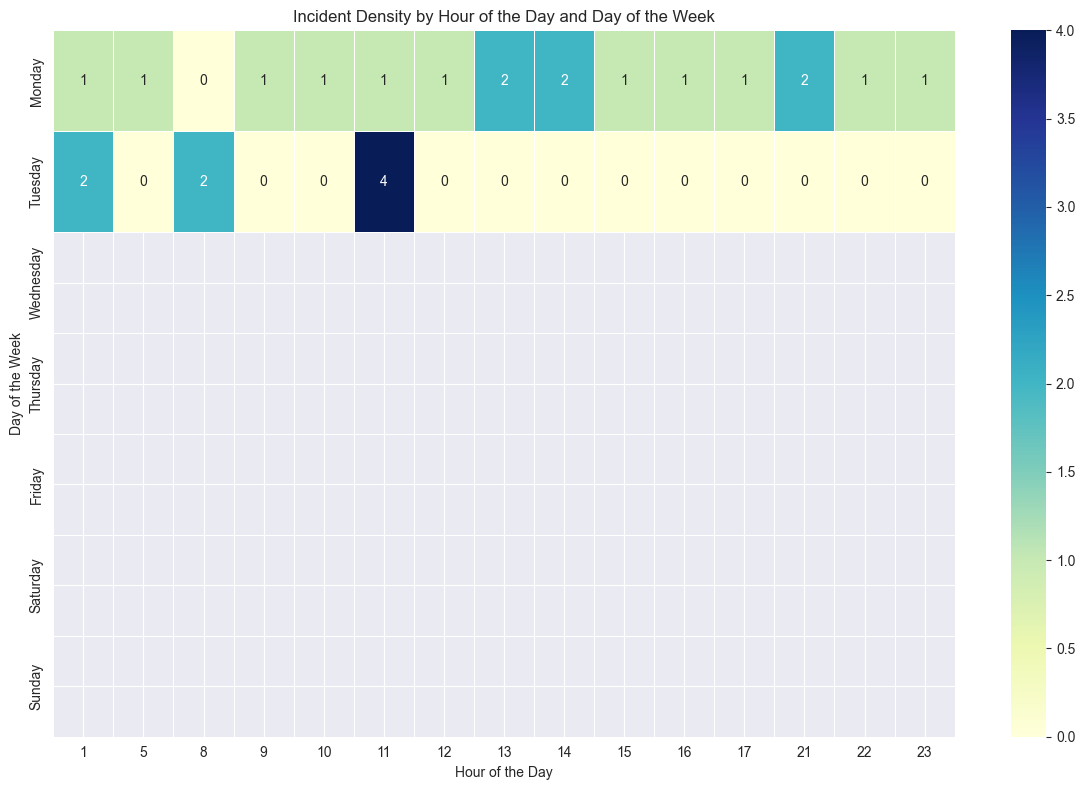

In [24]:
datix_df['Hour of Day'] = datix_df['Time of Incident'].dt.hour # Get hr

#pivot for heatmap
heatmap_data = datix_df.pivot_table(index='Day of Week', columns='Hour of Day', aggfunc='size', fill_value=0)

# Reorder days of the week for proper display (only Monday and Tuesday in dataset)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True)
plt.title('Incident Density by Hour of the Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


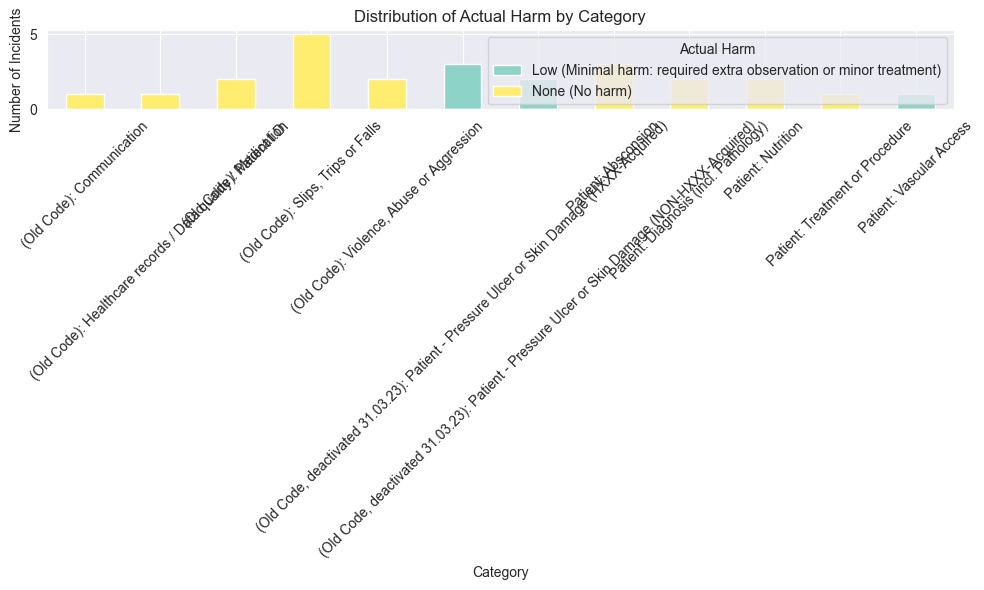

In [25]:
category_harm_dist = datix_df.groupby(['Category', 'Actual Harm']).size().unstack()

category_harm_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribution of Actual Harm by Category')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Actual Harm')
plt.tight_layout()
plt.show()


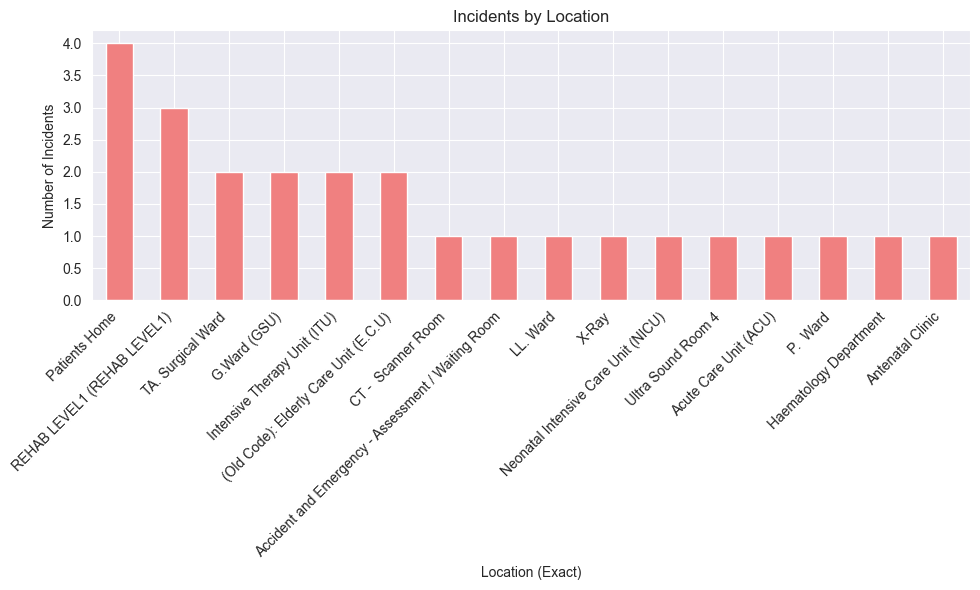

In [26]:
location_incidents = datix_df['Location (Exact)'].value_counts()

plt.figure(figsize=(10, 6))
location_incidents.plot(kind='bar', color='lightcoral')
plt.title('Incidents by Location')
plt.xlabel('Location (Exact)')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
